In [ ]:
# Imports 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans

In [14]:
# Load the CSV files
child_iq_df = pd.read_csv('./child_iq.csv')
gifted_df = pd.read_csv('./gifted.csv')
kid_iq_df = pd.read_csv('./kid_iq.csv')
twins_df = pd.read_csv('./twins.csv')

In [15]:
# Display the first few rows of each dataframe to verify
print("Child IQ Data:")
print(child_iq_df.head())

print("\nGifted Data:")
print(gifted_df.head())

print("\nKid IQ Data:")
print(kid_iq_df.head())

print("\nTwins Data:")
print(twins_df.head())

Child IQ Data:
   Unnamed: 0  ppvt  educ_cat  momage
0           1   120         2      21
1           2    89         1      17
2           3    78         2      19
3           4    42         1      20
4           5   115         4      26

Gifted Data:
   score  fatheriq  motheriq  speak  count  read  edutv  cartoons
0    159       115       117     18     26   1.9   3.00      2.00
1    164       117       113     20     37   2.5   1.75      3.25
2    154       115       118     20     32   2.2   2.75      2.50
3    157       113       131     12     24   1.7   2.75      2.25
4    156       110       109     17     34   2.2   2.25      2.50

Kid IQ Data:
   Unnamed: 0  kid_score  mom_hs      mom_iq  mom_work  mom_age
0           1         65       1  121.117529         4       27
1           2         98       1   89.361882         4       25
2           3         85       1  115.443165         4       27
3           4         83       1   99.449639         3       25
4           5

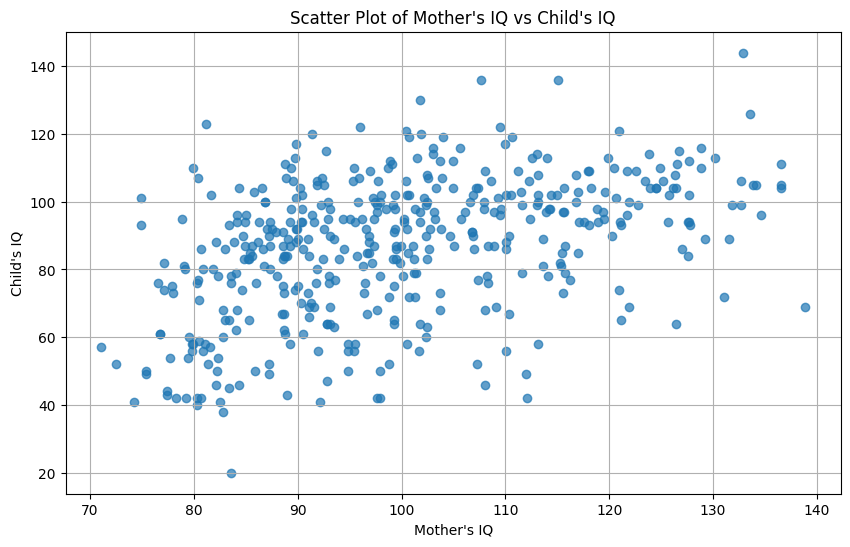

In [16]:
# Scatter plot for Mother's IQ vs Child's IQ
plt.figure(figsize=(10, 6))
plt.scatter(kid_iq_df['mom_iq'], kid_iq_df['kid_score'], alpha=0.7)
plt.title("Scatter Plot of Mother's IQ vs Child's IQ")
plt.xlabel("Mother's IQ")
plt.ylabel("Child's IQ")
plt.grid(True)
plt.show()


## Description: 

Women’s education is under valued in society. I am conducting a social impact analysis to use data in the fight for women’s empowerment. I will be using data from Colombia University to visualize the benefits a mother’s education can have on her child’s future. I will compare the mother’s impact vs. the father’s impact on child’s development.

## Task Abstraction:

The general public will compare data and identify trends between mother’s professional and educational growth with the child’s growth and development. Mother’s education is a vial joke on SNL. By presenting data, the general public can identify how investing in a mother’s education should not be a joke, but vital to the child’s growth and development.

## System specifications:

### color pallet: 

### Visualization 1: Regression analysis (original)

### Visualization 2: Cluster Feature on a 3D plot (original)

### Visualization 3: Idiom for Parental Attributes (Professor Feedback)

## Feedback:

EX. feedback note; author; my response or change to system as a result of the feedback 

1. Including additional parental attributes allows for a more nuanced analysis of the factors influencing a child's development.; Dr. Kristy Peterson; Visualization #3 was created in response to Dr. Peterson's feedback 

2. Adding interactive elements will make the visualizations more engaging and allow users to explore the data in more depth (navigate between different visualizations and any additional options for customization or exploration); Dr. Peterson; 

3.  Make the task abstraction more specific by detailing the exact data points and trends users will compare. This will help users understand the scope of the analysis.; Dr. Peterson;

4. Provide examples of how the data visualization will illustrate the impact of a mother’s education on a child's development.; Dr. Peterson; 

5. Comparing both mother’s and father’s educational impacts provides a balanced perspective and reinforces the importance of both parents; Dr. Peterson; 

6. Clearly explain which additional parental attributes will be included and why they are relevant to the analysis.; Dr. Peterson; 

7. Ensure that the additional attributes are integrated into the visualizations in a way that does not clutter the display or confuse users.; Dr. Peterson; 

8. Provide clear instructions or tooltips to help users navigate the interactive features.; Dr. Peterson

9. Conduct usability testing to ensure that the interactive elements are intuitive and enhance the overall user experience.; Dr. Peterson; 

10. Provide detailed documentation explaining the revisions and how they enhance the project. This will help users understand the rationale behind the changes.; Dr. Peterson 

11. color will benefit the idioms; peer review by Dr. Peterson & Felice Forby; Color pallet was created and incorporated 

## Citation: 

Data source: https://www.kaggle.com/datasets/jacopoferretti/child-vs-mother-iq

Unnamed: 0    0
kid_score     0
mom_hs        0
mom_iq        0
mom_work      0
mom_age       0
dtype: int64


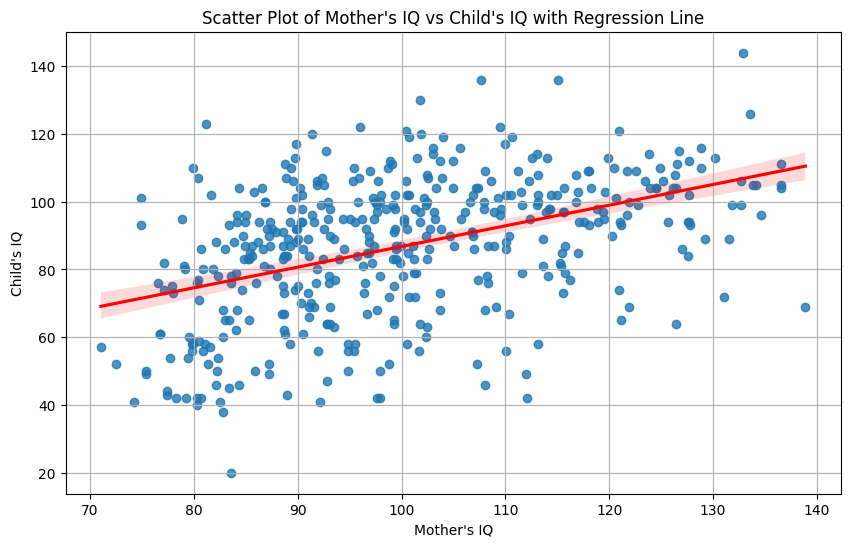

In [17]:
# Visualization 1: Regression analysis (original)

# Load the data
kid_iq_df = pd.read_csv('./kid_iq.csv')

# Check for missing values
print(kid_iq_df.isnull().sum())

# Prepare the data for regression
X = kid_iq_df[['mom_iq', 'mom_hs', 'mom_work', 'mom_age']]
y = kid_iq_df['kid_score']

# Add a constant term to the predictors (required for statsmodels)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='mom_iq', y='kid_score', data=kid_iq_df, line_kws={"color": "red"})
plt.title("Scatter Plot of Mother's IQ vs Child's IQ with Regression Line")
plt.xlabel("Mother's IQ")
plt.ylabel("Child's IQ")
plt.grid(True)
plt.show()



In [18]:
# Visualization 2: Cluster Feature on a 3D plot

# Load the CSV file
kid_iq_df = pd.read_csv('./kid_iq.csv')

# Check for missing values and handle them
kid_iq_df = kid_iq_df.dropna()

# Assuming 'fatheriq' column exists in another provided dataset 'gifted_df'
gifted_df = pd.read_csv('./gifted.csv')

# Merge the datasets on a common key if available or directly if rows correspond
data_df = pd.concat([kid_iq_df, gifted_df[['fatheriq']]], axis=1).dropna()

# Select relevant columns
X = data_df[['mom_iq', 'fatheriq', 'kid_score']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data_df['cluster'] = kmeans.fit_predict(X_scaled)


In [20]:
# Create an interactive 3D scatter plot
fig = px.scatter_3d(data_df, x='mom_iq', y='fatheriq', z='kid_score', color='cluster',
                    title='3D Scatter Plot of Mother IQ, Father IQ, and Child Scores with Clustering',
                    labels={'mom_iq': 'Mother IQ', 'fatheriq': 'Father IQ', 'kid_score': 'Child Score'})

# Show the plot
fig.show()
 

In [ ]:
# Visualization 3: Idiom for Parental Attributes (Professor Feedback)

# Step 3: Load and process the data
kid_iq_df = pd.read_csv('./kid_iq.csv')
gifted_df = pd.read_csv('./gifted.csv')
data_df = pd.concat([kid_iq_df, gifted_df[['fatheriq']]], axis=1).dropna()

# Step 4: Analyze relationships
sns.pairplot(data_df[['mom_iq', 'fatheriq', 'kid_score', 'mom_hs', 'mom_work', 'mom_age']])
plt.show()

correlation_matrix = data_df[['mom_iq', 'fatheriq', 'kid_score', 'mom_hs', 'mom_work', 'mom_age']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Step 5: Visualize the Tree of Growth
def draw_tree_of_growth():
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Draw the tree trunk
    trunk = patches.Rectangle((4.5, 0), 1, 4, linewidth=2, edgecolor='brown', facecolor='brown')
    ax.add_patch(trunk)
    
    # Draw the roots
    roots = {'Education': (4, -1), 'Profession': (5, -1), 'Involvement': (3.5, -2), 'Socio-economic Status': (6, -2)}
    for root, pos in roots.items():
        ax.plot([5, pos[0]], [0, pos[1]], linewidth=2, color='brown')
        ax.text(pos[0], pos[1] - 0.5, root, ha='center', fontsize=12, color='brown')
    
    # Draw the branches and leaves
    branches = {'Intellectual Growth': (3, 6), 'Emotional Well-being': (5, 8), 'Social Skills': (7, 6)}
    for branch, pos in branches.items():
        ax.plot([5, pos[0]], [4, pos[1]], linewidth=2, color='green')
        ax.text(pos[0], pos[1] + 0.5, branch, ha='center', fontsize=12, color='green')
    
    # Draw the tree canopy
    canopy = patches.Circle((5, 6), 3, linewidth=2, edgecolor='green', facecolor='lightgreen', alpha=0.5)
    ax.add_patch(canopy)
    
    # Set limits and remove axes
    ax.set_xlim(0, 10)
    ax.set_ylim(-3, 10)
    ax.axis('off')
    
    plt.title('Tree of Growth: Impact of Parental Attributes on Child Development', fontsize=16)
    plt.show()

# Draw the idiom
draw_tree_of_growth()
